In [3]:
from datasets import load_dataset
import pandas as pd

In [2]:
dataset = load_dataset("squad")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/1.82M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/87599 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/10570 [00:00<?, ? examples/s]

In [12]:
train_df = pd.DataFrame(dataset["train"])
val_df = pd.DataFrame(dataset["validation"])

print(train_df.head())

                         id                     title  \
0  5733be284776f41900661182  University_of_Notre_Dame   
1  5733be284776f4190066117f  University_of_Notre_Dame   
2  5733be284776f41900661180  University_of_Notre_Dame   
3  5733be284776f41900661181  University_of_Notre_Dame   
4  5733be284776f4190066117e  University_of_Notre_Dame   

                                             context  \
0  Architecturally, the school has a Catholic cha...   
1  Architecturally, the school has a Catholic cha...   
2  Architecturally, the school has a Catholic cha...   
3  Architecturally, the school has a Catholic cha...   
4  Architecturally, the school has a Catholic cha...   

                                            question  \
0  To whom did the Virgin Mary allegedly appear i...   
1  What is in front of the Notre Dame Main Building?   
2  The Basilica of the Sacred heart at Notre Dame...   
3                  What is the Grotto at Notre Dame?   
4  What sits on top of the Main Building

In [13]:
print("Train size:", len(train_df))
print("Validation size:", len(val_df))

Train size: 87599
Validation size: 10570


In [14]:
train_df["context_length"] = train_df["context"].apply(len)
print("Average context length:", train_df["context_length"].mean())

Average context length: 754.3642164864896


In [15]:
train_df["question_length"] = train_df["question"].apply(len)
print("Average question length:", train_df["question_length"].mean())

Average question length: 59.57113665681115


In [16]:
answer_starts = [a["answer_start"][0] for a in train_df["answers"]]
print("Average answer start index:", sum(answer_starts) / len(answer_starts))

Average answer start index: 319.87622004817405


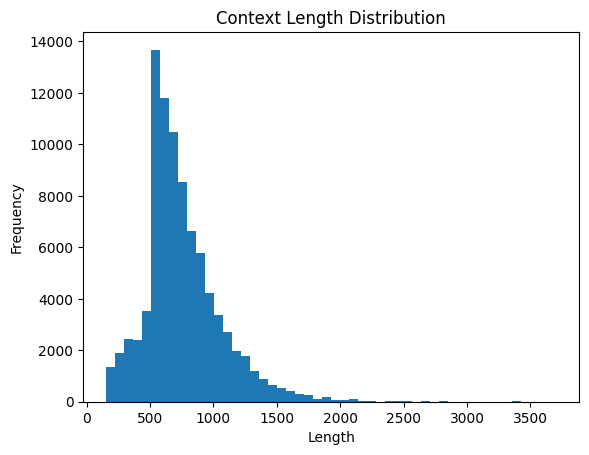

In [17]:
import matplotlib.pyplot as plt

# Histogram of context lengths
plt.hist(train_df["context_length"], bins=50)
plt.title("Context Length Distribution")
plt.xlabel("Length")
plt.ylabel("Frequency")
plt.show()